# ***Getting started with the final project!***
### **Assigned by -** Softanbees technologies ltd.
### **Assigned to -** Saima Khan



# **1. Data Understanding**



## Early Prediction of Birth weight Based on Maternal Factors

---
A low birth weight baby (birth weight < 2.5 kg) faces numerous health related and developmental problems throughout its life. Hence if a potential LBW case is identified during an early stage of pregnancy based on maternal factors, this can be brought under appropriate medical intervention scheme so that eventually the LBW can be avoided.

The LBW phenomenon has emerged as a scientific problem of immense Interest in recent years, and a good many studies across the globe on identifications of correlates of LBW prediction of LBW at an early stage of pregnancy etc have been reported, However, most of these studies are either not suitable under Indian conditions or require sophisticated instruments for assessment of maternal factors, often not suitable to be used by community health workers.


## **Import all necessary Libraries**

---

For **data analysis, visualization, numerical solution, data manipulation, modeling and evaluation** some packages and files are needed to upload.




In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats

## **Upload dataset and read**

Uploaded the given dataset as **lbw_data** by **pandas** package named as **pd** and read them by pandas file as well.

In [ ]:
# read dataset
lbw_data = pd.read_csv('/content/Saima Khan - Total_data.csv')

## **Dataset description**

---

This dataset consists of 74 features and a target variable. All are numeric variables. The detailed description of all the features are as follows:

**Categorical parameter**

**boh** = bad obsteric history i.e whether a woman had undergone any miscarriages before

**workload/worklo etc** = taking rest or having workload at different stages of pregnancy

**logit** = 1 if wt greater than 2.5kg and 0 if less than 2.5kg

**inject/inject2** = whether taken the injection or not

**iron/iron2** = whether taken the iron tonic or not

**conv1/conv2** = having convulsion or not

**asthma/asthma2** = asthma having or not

**lda** = column not required

**fever** = having fever or not


**parity** = Parity or order of gravida.

**mage** = Mother’s age.

**occup** = occupation of mother.

**f11** = Number of times protein taken in a week during 12 weeks of pregnancy.

**fand1** = Fundal height at 20th weeks of pregnancy

**ecostat** = Economic status of mother based on a few surrogates

**Significant factors:** 

**mage** = Mother’s age.

**occup** = Mother’s occupation.

**mwt2** = Mother’s weight at 20th week of pregnancy.

**belly1** = abdominal girth at20th weeks of pregnancy

**fand1** = Fundal height at 20th week of pregnancy.

**rest** = Rest taken by mother after lunch for two hours

at 20th week of pregnancy.

**mwt3** = Mother’s weight at 28th week of pregnancy.

**f13** = Number of times protein consumed by mother in a week at
28th week of pregnancy.

**Target variable**

**logit**: It is the target variable which we have to predict. 1 means child is having low birth rate and 0 means normal birth rate.

In [ ]:
#Let's see some of the sample entries of dataset
lbw_data.head()

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,42,101007,3,3.4,1,26.83,39.75,1.50,20.0,51.0,1,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,43.0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46.1,80.5,25.4,100.0,80.0,1.0,30.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667,1
1,27,101008,4,3.5,1,17.92,45.00,1.52,22.0,52.0,1,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,44.5,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,-45.00,19.477147,1
2,158,101009,1,3.0,1,35.00,43.00,1.50,20.0,53.0,0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,47.0,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.5,81.5,23.0,90.0,50.0,2.0,15.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111,1
3,156,101010,1,3.0,1,26.00,40.00,1.48,21.0,51.5,1,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,44.0,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,78.0,20.0,102.0,52.0,2.0,50.0,1.0,1.0,7.0,3.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505,1
4,155,101013,1,3.0,1,25.00,56.00,1.51,28.0,49.5,1,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,54.5,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.5,85.5,19.0,98.0,62.0,2.0,30.0,1.0,1.0,7.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326,1


In [ ]:
lbw_data.shape

(666, 75)

In [ ]:
lbw_data.columns

Index(['Unnamed: 0', 'id', 'parity', 'childwt', 'logit', 'mage', 'mwt', 'mht',
       'mdarm', 'head', 'relg', 'habit', 'occup', 'educ', 'workload', 'f11',
       'f21', 'f31', 'f41', 'anemia', 'asthma', 'wm18', 'ageyc', 'boh',
       'ecostat', 'mwt2', 'belly1', 'fand1', 'sis1', 'dis1', 'inject', 'falif',
       'iron', 'worklo', 'f12', 'f22', 'f32', 'f42', 'rest', 'conv1', 'd21',
       'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1', 'db1',
       'mwt3', 'belly2', 'fand2', 'sis2', 'dia2', 'inject2', 'falif2', 'iron2',
       'workl', 'f13', 'f23', 'f33', 'f43', 'rest1', 'conv2', 'd', 'bleed',
       'blddef', 'asthm', 'fever', 'lomot', 'contab', 'db', 'wg1', 'wg2',
       'BMI', 'lda'],
      dtype='object')

In [ ]:
# The info() function is used to show range of index, column type, data type, memory usage
# Here, info() is used to know the data type and column type
lbw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  666 non-null    int64  
 1   id          666 non-null    int64  
 2   parity      666 non-null    int64  
 3   childwt     666 non-null    float64
 4   logit       666 non-null    int64  
 5   mage        666 non-null    float64
 6   mwt         666 non-null    float64
 7   mht         666 non-null    float64
 8   mdarm       666 non-null    float64
 9   head        666 non-null    float64
 10  relg        666 non-null    int64  
 11  habit       666 non-null    int64  
 12  occup       666 non-null    int64  
 13  educ        666 non-null    int64  
 14  workload    666 non-null    int64  
 15  f11         666 non-null    int64  
 16  f21         665 non-null    float64
 17  f31         665 non-null    float64
 18  f41         665 non-null    float64
 19  anemia      666 non-null    i

In [ ]:
lbw_data.describe()

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,665.000000,665.000000,666.000000,666.000000,664.000000,420.000000,408.000000,666.000000,614.000000,613.000000,612.000000,613.000000,613.000000,612.000000,601.000000,613.000000,612.000000,613.000000,609.000000,613.000000,613.000000,612.000000,613.000000,613.000000,612.000000,612.000000,610.000000,611.000000,611.000000,610.000000,606.000000,602.000000,602.000000,602.000000,601.000000,601.000000,555.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,605.000000,602.000000,600.000000,602.000000,601.000000,600.000000,602.000000,597.000000,602.000000,599.000000,349.000000,666.000000,550.000000,666.000000
mean,333.500000,154470.540541,2.066066,2.703116,0.756757,22.293288,43.522598,1.506970,21.549550,50.861607,0.644144,0.073574,0.402402,0.252252,0.954955,4.551051,3.639098,1.255639,2.715789,0.693694,0.024024,1.984940,2.836214,0.500000,0.890390,45.131433,71.647798,13.456699,106.216966,65.564437,1.253268,22.795341,0.778140,0.919935,4.915171,4.264368,1.791191,2.879282,0.383987,0.006525,0.026101,0.034314,0.736928,0.014754,0.019640,0.024550,0.001639,0.663366,47.618688,78.422259,20.533555,102.820300,61.570715,1.945946,51.019934,1.789037,0.887043,4.822259,4.338870,2.091362,2.895349,0.337190,0.019934,0.090000,0.006645,0.653910,0.061667,0.023256,0.018425,0.003322,0.699499,1.541691,-0.479880,19.171350,0.513514
std,192.401923,50571.781097,1.143200,0.461223,0.429363,3.738330,6.660496,0.058678,2.366491,1.679169,0.479132,0.261272,0.665087,0.434632,0.207559,2.083506,2.167456,2.459473,2.347546,0.461305,0.153239,1.083156,2.268645,0.500614,0.876595,6.468234,6.421824,2.595843,10.093852,9.696936,0.652006,25.909002,0.415837,0.271616,1.985893,1.956113,2.825905,2.228407,0.531747,0.080581,0.159566,0.182183,0.440661,0.120666,0.138873,0.154876,0.040489,0.472949,6.503536,6.809847,7.288491,14.778509,19.492701,0.454378,40.573463,6.350836,0.316803,2.126601,1.990355,2.970172,2.223160,0.473142,0.139888,0.286421,0.081310,0.476119,0.240750,0.150840,0.134597,0.057591,0.458859,2.081197,14.394533,2.712150,0.858726
min,1.000000,101007.000000,1.000000,0.500000,0.000000,14.000000,26.500000,1.160000,13.500000,41.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.500000,55.500000,4.500000,80.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.600000,15.000000,9.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.500000,-63.000000,11.764706,-1.000000
25%,167.250000,106066.500000,1.000000,2.500000,1.000000,19.750000,39.000000,1.470000,20.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.250000,0.000000,0.000000,41.000000,67.200000,11.800000,100.000000,60.000000,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.425000,74.500000,18.625000,100.000000,60.000000,2.000000,15.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

**The describe() function computes a summary of statistics pertaining to the dataframe columns**



1.   count() presents total count of every column data
2.   mean() presents the avg values of every column
3. std() presents the standard deviation value of every column
4. min() presents the minimum value of every column
5. max() presents the maximum value of every column

# **2. Data Cleaning (methodology and proper understanding of cleaning)**


**Data cleaning** refers to identifying and correcting errors in the dataset that may negatively impact a predictive model. Data cleaning is used to refer to all kinds of tasks and activities to detect and repair errors in the data.

To begin with, all data analytics processes start with a basic truism: **Garbage in, garbage out.** If the data being analyzed is not accurate and representative of the world, then it's not useful.

**The list of errors that found from the lbw_data dataset:**

1. Irrelevant observations
2. Missing data
3. Structural errors

**The tasks are listed down which will be used for mitigating the errors and convert it to a tidy dataset:**

1. Dropping the unwanted columns from lbw_data
2. Rename complex columns name to simple columns name for better understanding
3. Missing data and null values handling by Imputation
4. Creating subset of column & group_by counts and make new dataframe


**1. Dropping the unwanted columns from lbw_data**

In [ ]:
# Used drop() function for removing unnecessary features
lbw_data = lbw_data.drop(['Unnamed: 0','id','lda','relg','mwt','mwt2','mwt3'], axis = 'columns', inplace = False)

In [ ]:
lbw_data.shape

(666, 68)

In [ ]:
lbw_data.head()

,parity,childwt,logit,mage,mht,mdarm,head,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI
0,3,3.4,1,26.83,1.50,20.0,51.0,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.5,25.4,100.0,80.0,1.0,30.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667
1,4,3.5,1,17.92,1.52,22.0,52.0,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,-45.00,19.477147
2,1,3.0,1,35.00,1.50,20.0,53.0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,81.5,23.0,90.0,50.0,2.0,15.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111
3,1,3.0,1,26.00,1.48,21.0,51.5,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,78.0,20.0,102.0,52.0,2.0,50.0,1.0,1.0,7.0,3.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505
4,1,3.0,1,25.00,1.51,28.0,49.5,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.5,19.0,98.0,62.0,2.0,30.0,1.0,1.0,7.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326


In [ ]:
lbw_data.columns

Index(['parity', 'childwt', 'logit', 'mage', 'mht', 'mdarm', 'head', 'habit',
       'occup', 'educ', 'workload', 'f11', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'wm18', 'ageyc', 'boh', 'ecostat', 'belly1', 'fand1', 'sis1',
       'dis1', 'inject', 'falif', 'iron', 'worklo', 'f12', 'f22', 'f32', 'f42',
       'rest', 'conv1', 'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1',
       'lomot1', 'contab1', 'db1', 'belly2', 'fand2', 'sis2', 'dia2',
       'inject2', 'falif2', 'iron2', 'workl', 'f13', 'f23', 'f33', 'f43',
       'rest1', 'conv2', 'd', 'bleed', 'blddef', 'asthm', 'fever', 'lomot',
       'contab', 'db', 'wg1', 'wg2', 'BMI'],
      dtype='object')

**2. Rename complex columns name to simple columns name for better understanding**

In [ ]:
# Used rename() function for renaming feature names
lbw_data.rename(columns = {
    'childwt': 'child_weight', 'logit': 'target', 'mage':'mother_age', 'mht': 'mother_height', 'mdarm': 'mid_arm_cir', 'head':'head_cir',
       'occup':'occupation', 'educ':'education', 'f11':'proteinTime_12th_week',
       'wm18':'adult_wom_18', 'ageyc':'age_at_pregnancy', 'boh':'bad_obs_history', 'ecostat':'econoic_status',
       'belly1':'abdominal_girth_20wk', 'fand1':'Fundal_height_20wk', 'sis1':'1st_systolic', 'dis1':'1st_diastolic', 'inject':'injection', 'worklo':'2nd_workload',
       'conv1':'1st_convolusion', 'belly2':'abdominal_girth_28wk',
       'fand2':'Fundal_height_28wk', 'sis2':'2nd_systolic', 'dia2':'2nd_diastolic', 'workl':'3rd_workload', 'f13':'proteinTime_28th_week',
       'conv2':'2nd_convolusion','asthm':'asthma'
}, inplace = True)

In [ ]:
lbw_data.columns

Index(['parity', 'child_weight', 'target', 'mother_age', 'mother_height',
       'mid_arm_cir', 'head_cir', 'habit', 'occupation', 'education',
       'workload', 'proteinTime_12th_week', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'adult_wom_18', 'age_at_pregnancy', 'bad_obs_history',
       'econoic_status', 'abdominal_girth_20wk', 'Fundal_height_20wk',
       '1st_systolic', '1st_diastolic', 'injection', 'falif', 'iron',
       '2nd_workload', 'f12', 'f22', 'f32', 'f42', 'rest', '1st_convolusion',
       'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1',
       'db1', 'abdominal_girth_28wk', 'Fundal_height_28wk', '2nd_systolic',
       '2nd_diastolic', 'inject2', 'falif2', 'iron2', '3rd_workload',
       'proteinTime_28th_week', 'f23', 'f33', 'f43', 'rest1',
       '2nd_convolusion', 'd', 'bleed', 'blddef', 'asthma', 'fever', 'lomot',
       'contab', 'db', 'wg1', 'wg2', 'BMI'],
      dtype='object')

**3. Missing data and null values handling by Imputation**

In [ ]:
# Showing number of null values in every column
lbw_data.isnull().sum()

parity             0
child_weight       0
target             0
mother_age         0
mother_height      0
                ... 
contab            64
db                67
wg1              317
wg2                0
BMI              116
Length: 68, dtype: int64

In [ ]:
# Showing duplicate values 
lbw_data.duplicated().sum()

0

In [ ]:
# Used simpleImputer for imputing null values and missing data which return most frequent data and replace them.
from sklearn.impute import SimpleImputer

impt = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
lbw_data = impt.fit_transform(lbw_data)

In [ ]:
# create dataframe from array
lbw_data = pd.DataFrame(lbw_data, columns=[
                                           'parity', 'child_weight', 'target', 'mother_age', 'mother_height',
       'mid_arm_cir', 'head_cir', 'habit', 'occupation', 'education',
       'workload', 'proteinTime_12th_week', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'adult_wom_18', 'age_at_pregnancy', 'bad_obs_history',
       'econoic_status', 'abdominal_girth_20wk', 'Fundal_height_20wk',
       '1st_systolic', '1st_diastolic', 'injection', 'falif', 'iron',
       '2nd_workload', 'f12', 'f22', 'f32', 'f42', 'rest', '1st_convolusion',
       'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1',
       'db1', 'abdominal_girth_28wk', 'Fundal_height_28wk', '2nd_systolic',
       '2nd_diastolic', 'inject2', 'falif2', 'iron2', '3rd_workload',
       'proteinTime_28th_week', 'f23', 'f33', 'f43', 'rest1',
       '2nd_convolusion', 'd', 'bleed', 'blddef', 'asthma', 'fever', 'lomot',
       'contab', 'db', 'wg1', 'wg2', 'BMI'
])

In [ ]:
lbw_data.head()

,parity,child_weight,target,mother_age,mother_height,mid_arm_cir,head_cir,habit,occupation,education,workload,proteinTime_12th_week,f21,f31,f41,anemia,asthma,adult_wom_18,age_at_pregnancy,bad_obs_history,econoic_status,abdominal_girth_20wk,Fundal_height_20wk,1st_systolic,1st_diastolic,injection,falif,iron,2nd_workload,f12,f22,f32,f42,rest,1st_convolusion,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,abdominal_girth_28wk,Fundal_height_28wk,2nd_systolic,2nd_diastolic,inject2,falif2,iron2,3rd_workload,proteinTime_28th_week,f23,f33,f43,rest1,2nd_convolusion,d,bleed,blddef,asthma,fever,lomot,contab,db,wg1,wg2,BMI
0,3.0,3.4,1.0,26.83,1.50,20.0,51.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0,0.0,1.0,0.0,2.0,1.75,0.0,0.0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.5,25.4,100.0,80.0,1.0,30.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667
1,4.0,3.5,1.0,17.92,1.52,22.0,52.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,0.0,2.0,0.00,1.0,0.0,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,75.0,20.0,110.0,70.0,2.0,50.0,1.0,1.0,7.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.50,-45.00,19.477147
2,1.0,3.0,1.0,35.00,1.50,20.0,53.0,1.0,1.0,1.0,1.0,7.0,5.0,0.0,4.0,1.0,0.0,2.0,4.00,1.0,1.0,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,81.5,23.0,90.0,50.0,2.0,15.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111
3,1.0,3.0,1.0,26.00,1.48,21.0,51.5,0.0,1.0,0.0,1.0,2.0,3.0,7.0,4.0,0.0,0.0,1.0,8.00,0.0,2.0,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,78.0,20.0,102.0,52.0,2.0,50.0,1.0,1.0,7.0,3.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505
4,1.0,3.0,1.0,25.00,1.51,28.0,49.5,0.0,1.0,0.0,1.0,7.0,5.0,2.0,7.0,0.0,0.0,1.0,5.00,0.0,1.0,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.5,19.0,98.0,62.0,2.0,30.0,1.0,1.0,7.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326


# **3. Data Exploration (Historical analysis report)**

The data exploration reveals that the dataset is heavily imbalanced, with about **24%** of observations being infants born with low weight **(LBW=0)** and **75%** with normal weight**(NBW=1)**.

In [ ]:
lbw_data.target.value_counts()

1.0    504
0.0    162
Name: target, dtype: int64

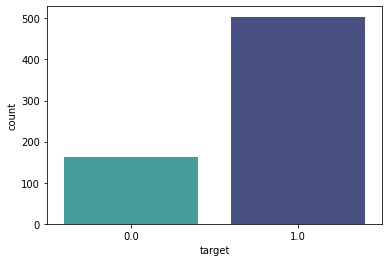

In [ ]:
sns.countplot(x="target",data=lbw_data,palette="mako_r")
plt.show()

In [ ]:
countNBW=len(lbw_data[lbw_data.target==1])
countLBW=len(lbw_data[lbw_data.target==0])
print("Percentage of children have normal birth weight:{:.2f}%".format((countNBW/(len(lbw_data.target))*100)))
print("Percentage of children have low birth weight:{:.2f}%".format((countLBW/(len(lbw_data.target))*100)))

Percentage of children have normal birth weight:75.68%
Percentage of children have low birth weight:24.32%


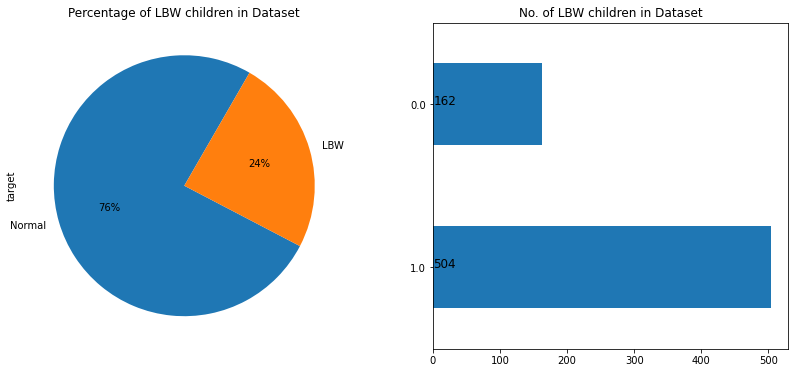

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = lbw_data['target'].value_counts().plot.pie( x="LBW" ,y ='no.of children', 
                   autopct = "%1.0f%%",labels=["Normal","LBW"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of LBW children in Dataset')

ax2 = lbw_data["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(lbw_data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of LBW children in Dataset')
plt.show()

**Low Birth Weight frequency table**

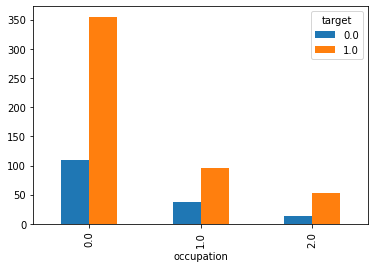

In [ ]:
# Low birth weight grouped by Occupation

pd.crosstab(lbw_data['occupation'],lbw_data['target']).plot.bar()

In [ ]:
pd.crosstab(lbw_data['occupation'],lbw_data['target'], normalize='index')

target,0.0,1.0
occupation,,
0.0,0.236559,0.763441
1.0,0.283582,0.716418
2.0,0.208955,0.791045


Additionally, while analyzing the mothers’ this lead to think that option 1 women are more at risk of having children with low birth weight.

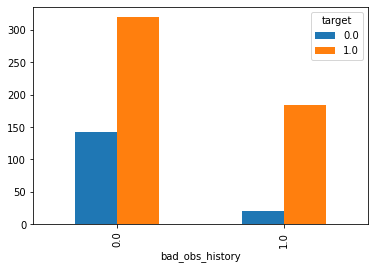

In [ ]:
# Low birth weight grouped by Mother's bad_obs_history

pd.crosstab(lbw_data['bad_obs_history'],lbw_data['target']).plot.bar()

In [ ]:
pd.crosstab(lbw_data['bad_obs_history'],lbw_data['target'], normalize='index')

target,0.0,1.0
bad_obs_history,,
0.0,0.307359,0.692641
1.0,0.098039,0.901961


Similarly, women who have bad obsteric history tend to have higher risk compared to those who do not.

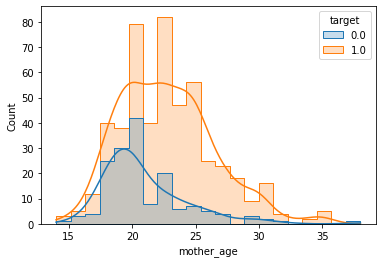

In [ ]:
# Low birth weight grouped by Mother's bad_obs_history
sns.histplot(data=lbw_data, x="mother_age", hue="target",kde=True, element="step")

The age variable was found to be well distributed across the dataset, with the average age being about the same in both class (LOW and normal weight); however, the case of low birth weight was mostly observed in women between 20 and 25 years old.

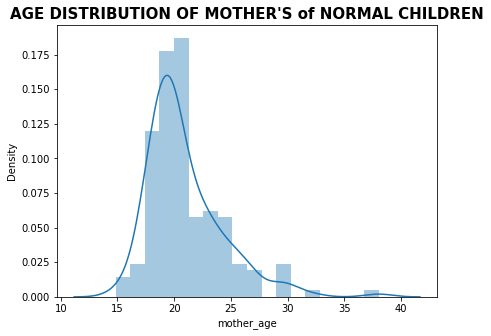

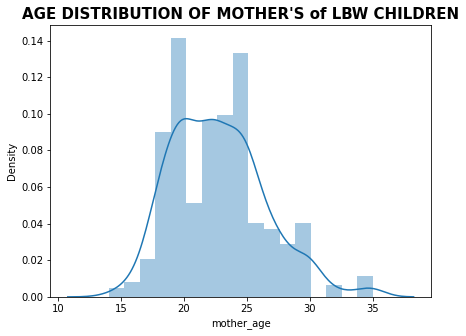

In [ ]:
# creating separate df for normal and LBW children

attr_1=lbw_data[lbw_data['target']==1]

attr_0=lbw_data[lbw_data['target']==0]

# plotting mother's age for normal children
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['mother_age'])
plt.title("AGE DISTRIBUTION OF MOTHER'S of NORMAL CHILDREN", fontsize=15, weight='bold')

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['mother_age'])
plt.title("AGE DISTRIBUTION OF MOTHER'S of LBW CHILDREN", fontsize=15, weight='bold')

plt.show()

# **4. Feature Engineering**

After exploring the dataset, It is found that some variables are needed to scale.


Now, I will use the ***StandardScaler*** from ***sklearn*** to scale my dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['mother_age',
                    
                    'mid_arm_cir',
                    'head_cir',
                    
                    'abdominal_girth_20wk',
                    'Fundal_height_20wk',
                    '1st_systolic',
                    '1st_diastolic',
                    
                    'abdominal_girth_28wk',
                    'Fundal_height_28wk',
                    '2nd_systolic',
                    '2nd_diastolic',
                    'BMI']
lbw_data[columns_to_scale] = standardScaler.fit_transform(lbw_data[columns_to_scale])

From the given file some supportive features found for running regression. Those are listed below -
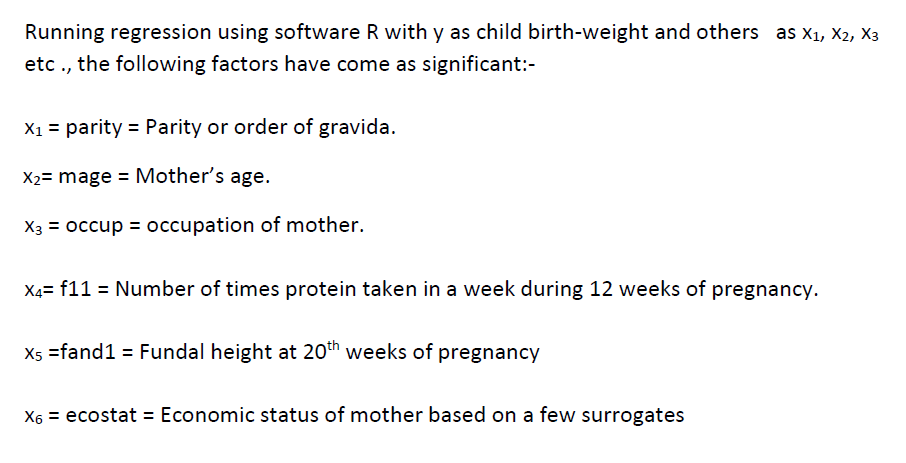

Similarly, from the given file some supportive features found for running classification. Those are listed below -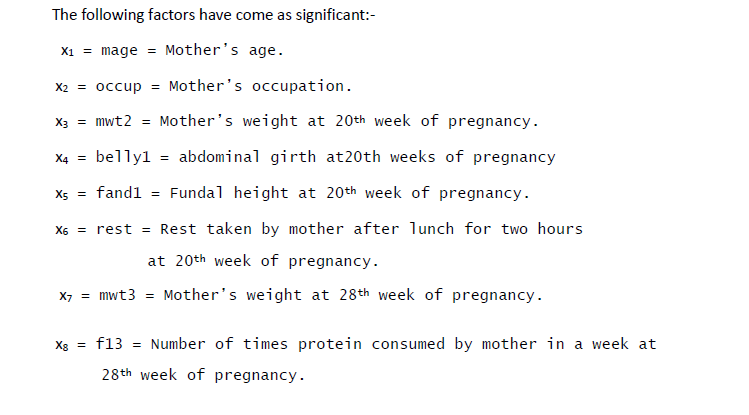

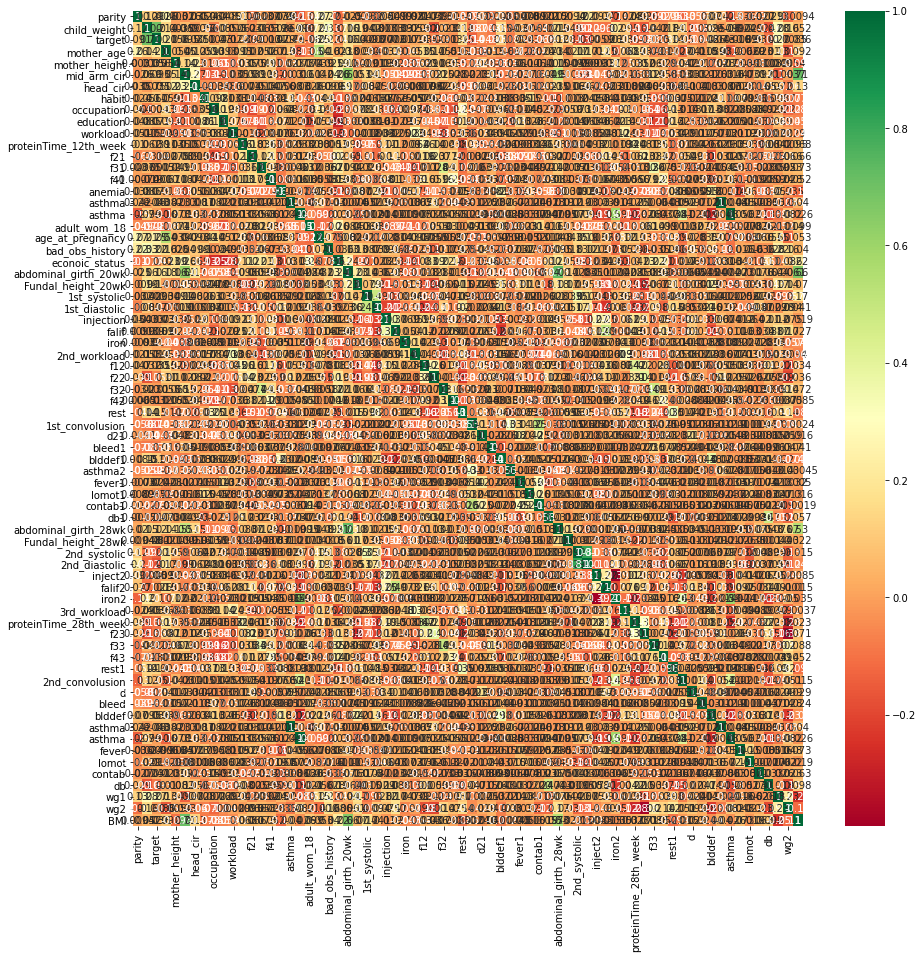

In [ ]:
#get correlations of each features in dataset
corrmat = lbw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(lbw_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
lbw_data.columns

Index(['parity', 'child_weight', 'target', 'mother_age', 'mother_height',
       'mid_arm_cir', 'head_cir', 'habit', 'occupation', 'education',
       'workload', 'proteinTime_12th_week', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'adult_wom_18', 'age_at_pregnancy', 'bad_obs_history',
       'econoic_status', 'abdominal_girth_20wk', 'Fundal_height_20wk',
       '1st_systolic', '1st_diastolic', 'injection', 'falif', 'iron',
       '2nd_workload', 'f12', 'f22', 'f32', 'f42', 'rest', '1st_convolusion',
       'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1',
       'db1', 'abdominal_girth_28wk', 'Fundal_height_28wk', '2nd_systolic',
       '2nd_diastolic', 'inject2', 'falif2', 'iron2', '3rd_workload',
       'proteinTime_28th_week', 'f23', 'f33', 'f43', 'rest1',
       '2nd_convolusion', 'd', 'bleed', 'blddef', 'asthma', 'fever', 'lomot',
       'contab', 'db', 'wg1', 'wg2', 'BMI'],
      dtype='object')

In [ ]:
# Flittering out the unnecessary columns & store the new dataset which is lbw_data_sub
lbw_data_sub = lbw_data[[  'parity', 'target', 'mother_age', 'mother_height', 'mid_arm_cir','workload',
                               'anemia', 'asthma', 'bad_obs_history', 'injection', 'falif','iron', '2nd_workload', '1st_convolusion',
                               'bleed1','asthma2','inject2', 'iron2', '2nd_convolusion', 'bleed','fever','BMI']]

Train Test Split

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = lbw_data_sub.drop(['target'],axis=1)
y = lbw_data_sub['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25,shuffle=True, random_state=5)

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1.0    378
0.0    121
Name: target, dtype: int64
Distribution of traget variable in test set
1.0    126
0.0     41
Name: target, dtype: int64


In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(499, 22)
(499,)
------------Test Set------------------
(167, 22)
(167,)


## Cross Validation

In this step, we will build different baseline models and perform **5-fold** cross validation to filter top performing baseline models.

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('Logistic Regression'   , LogisticRegression(penalty='l2')))
    basedModels.append(('K Neighbors Classifier'  , KNeighborsClassifier(9)))
    basedModels.append(('Decision Tree Classifier' , DecisionTreeClassifier()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('Random Forest Classifier1'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('Random Forest Classifier2'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 5
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

Logistic Regression: 0.755495 (0.032727)
K Neighbors Classifier: 0.755515 (0.034367)
Decision Tree Classifier: 0.809697 (0.027859)
SVM Linear: 0.743576 (0.045008)
SVM RBF: 0.755556 (0.042935)
GBM: 0.831717 (0.052540)
Random Forest Classifier1: 0.833717 (0.040120)
Random Forest Classifier2: 0.835737 (0.048646)


# **5. Model building**

**1. Linear Regression**

---



As it is a classification problem, so **Linear Regression** is not the best choice for this problem. How bad the linear regression works on this dataset is shown below-

In [ ]:
reg_data = lbw_data[['parity','mother_age','occupation','proteinTime_12th_week','Fundal_height_20wk','econoic_status','target']].copy()


In [ ]:
reg_data.head()

,parity,mother_age,occupation,proteinTime_12th_week,Fundal_height_20wk,econoic_status,target
0,3.0,1.214478,0.0,5.0,1.454129,0.0,1.0
1,4.0,-1.170730,0.0,3.0,-0.611050,0.0,1.0
2,1.0,3.401589,1.0,7.0,2.248429,1.0,1.0
3,1.0,0.992287,1.0,2.0,-0.531620,2.0,1.0
4,1.0,0.724587,1.0,7.0,-0.531620,1.0,1.0


In [ ]:
reg_data.shape

(666, 7)

In [ ]:
from sklearn.model_selection import train_test_split # split train and test data
y_data = reg_data['target']
X_data = reg_data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression #linear regression 
lm = LinearRegression()
lin_reg = lm.fit(X_train, y_train)
lin_reg.score(X_train, y_train)
X_train.shape

(499, 6)

In [ ]:
lin_reg.score(X_test, y_test) # R^2 score for test set

0.00588589836240383

Here Adjusted **R^2 = .00588** which shows that the fit is **not satisfactory**.

**Test for auto correlation by using Durbin Watson test.**

---



Values of 1.5 < **Durbin-watson test** < 2.5 generally show that there is no autocorrelation in the data.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

ols_res = OLS(X_train, y_train).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

array([1.76612362, 1.96194434, 1.93751954, 1.83570332, 2.0994611 ,
       1.91560493])

The values of Durbin Watson have shown above.That means there is no Auto correlation.

## **Classification model building**

---



In [ ]:
from sklearn.model_selection import train_test_split # split train and test data
y = lbw_data_sub['target']
X = lbw_data_sub.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**Logistic regression**

In [ ]:
Logistic=LogisticRegression(C=0.03, solver='liblinear')
Logistic.fit(X_train,y_train)
y_pred_logi = Logistic.predict(X_test)
X_train.shape

(499, 22)

**Random Forest Classifier (criterion = 'entropy')**

In [ ]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

**K nearest neighbour (n=9)**

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

**Support Vector Classifier (kernel='linear')**

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

**decision Tree Classifier (CART)**

In [ ]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

**gradient boosting classifier**

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

# **6. Model Evaluation**

In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is ***sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient*** and finally **ROC AUC curve**

**Mathew Correlation coefficient (MCC)**

The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

**Log Loss**

Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.


The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!


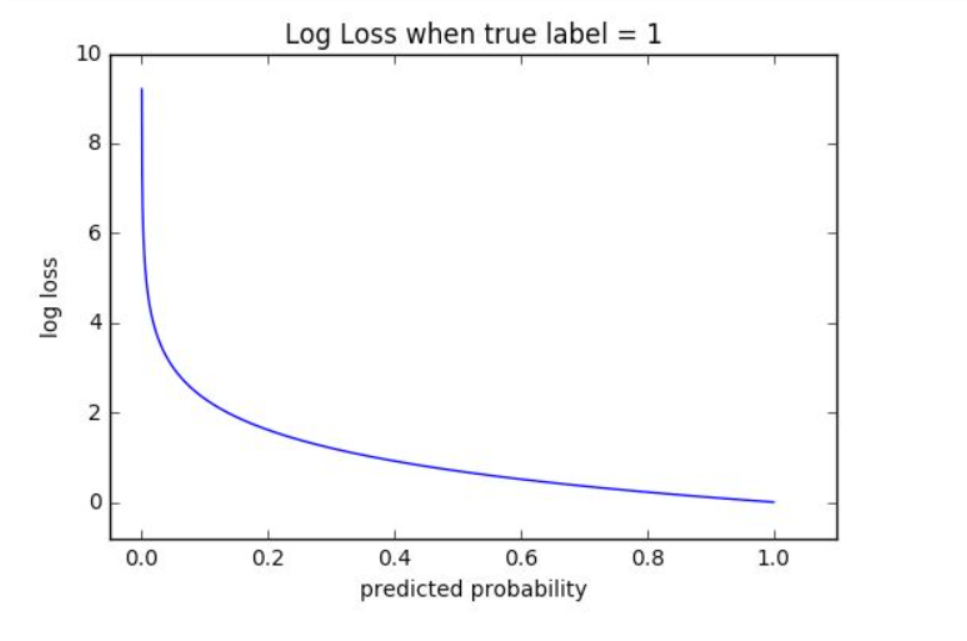

 **F1 Score**

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

**F1 Score** = 2*(Recall * Precision) / (Recall + Precision) 

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.868263,0.879433,0.96124,0.552632,0.918519,0.756936,4.5501,0.594217


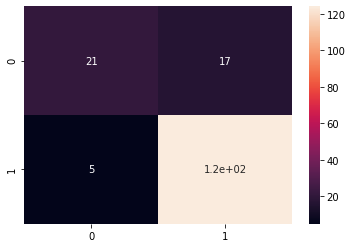

In [ ]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

**Comparison with other Models**

In [ ]:
data = {        'logistic': y_pred_logi,
                'KNN': y_pred_knn,  
                'SVC': y_pred_svc,  
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.868263,0.879433,0.961240,0.552632,0.918519,0.756936,4.550100,0.594217
1,logistic,0.772455,0.775758,0.992248,0.026316,0.870748,0.509282,7.859300,0.071548
2,KNN,0.754491,0.793333,0.922481,0.184211,0.853047,0.553346,8.479728,0.147926
3,SVC,0.772455,0.772455,1.000000,0.000000,0.871622,0.500000,7.859305,0.000000
4,CART,0.862275,0.914062,0.906977,0.710526,0.910506,0.808752,4.756890,0.611911
5,GBM,0.862275,0.863014,0.976744,0.473684,0.916364,0.725214,4.756933,0.569543


### **Findings**

Random Forest Classifier has the highest accuracy.

### ROC AUC Curve

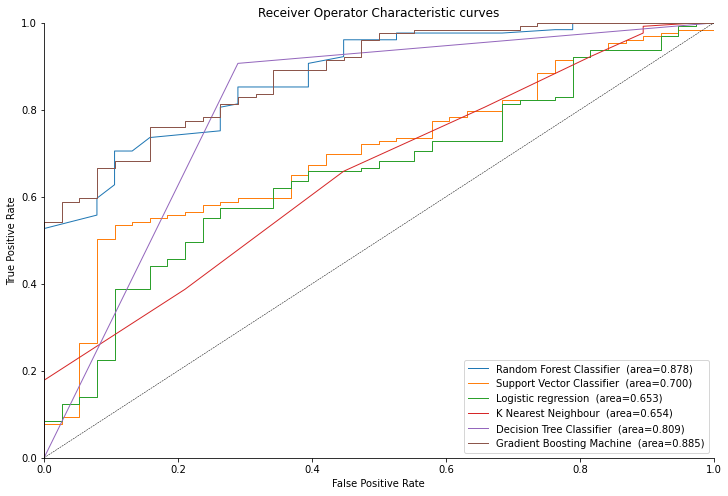

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,svc.predict_proba(X_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,Logistic.predict_proba(X_test),label='Logistic regression ',l='-')
roc_auc_plot(y_test,knn.predict_proba(X_test),label='K Nearest Neighbour ',l='-')
roc_auc_plot(y_test,decc.predict_proba(X_test),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_test,gbm.predict_proba(X_test),label='Gradient Boosting Machine ',l='-')





ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

#### Precision Recall curve

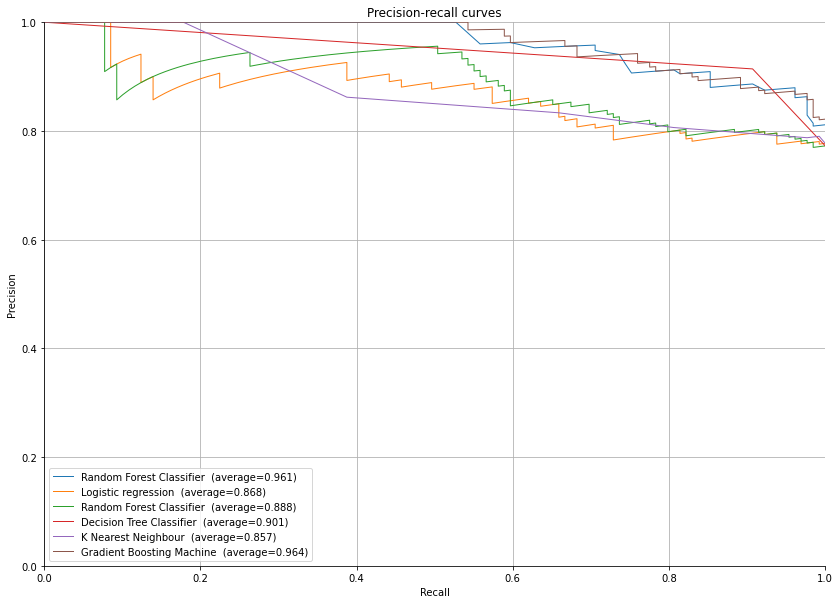

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,Logistic.predict_proba(X_test),label='Logistic regression ',l='-')
precision_recall_plot(y_test,svc.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,decc.predict_proba(X_test),label='Decision Tree Classifier ',l='-')
precision_recall_plot(y_test,knn.predict_proba(X_test),label='K Nearest Neighbour ',l='-')
precision_recall_plot(y_test,gbm.predict_proba(X_test),label='Gradient Boosting Machine ',l='-')


ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

### **Feature Importance**

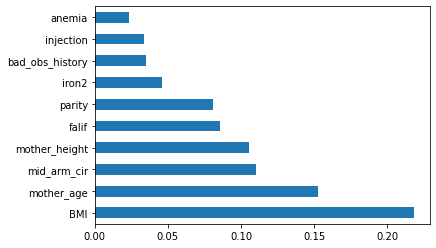

In [ ]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

# **7. Report**

---


In this project, I have discussed various approaches to deal with the problem of **Classification**. These are `Logistic Regression`, `K Neighbors Classifier`, `Decision Tree Classifier`, `Support Vector Classifier`, `Gradient Boosting Classifier` and  `RandomForestClassifier`.

*As we can see from above results, Decision Tree Classifier is best performer as it has highest test accuracy of 0.8682, sensitivity 0.9612 and highest f1-score of 0.9185 and lowest Log Loss of 4.5501*

The top 10 most contribution features are also listed above.


So, based on the above discussion, we can conclude that there is no one solution to deal with the classification problem. 
We should try out multiple methods to select the best-suited classification model for the dataset in hand. The most effective model will vary according to the characteristics of the dataset.
